## Outliers
Not all data can be trusted, many times we can have error in data which might lead to poor models. Such erroneous data points that can be introduced due to human errors / conversion errors are called __Outliers__. There are certain models that are sensitive to outliers (e.g. Linear Regression) hence presence of such outliers will degrade the performance of your machine learning model. 

## Outlier removal
Outlier removal is the process of removing such outliers and making your model better. An application of KMeans clustering is outlier removal. We can use the following algorithm to achieve that:

1. Cluster the data using KMeans. 
2. Find $n$ points fatherest from centroids. 
3. If any of the $n$ points are significantly far from the cluster centroid then remove these points. 

In [1]:
# create a fake dataset 
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs


X, y = make_blobs(100, centers=1)

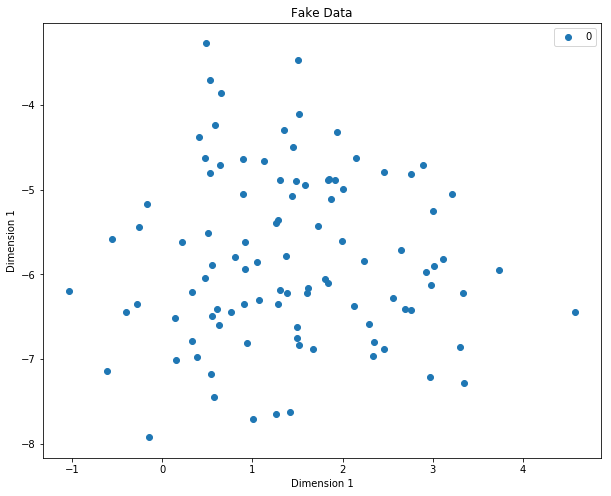

In [2]:
# visualize the data

fig = plt.figure(figsize=(10, 8))
def plot_clusters(X, y):
    for label in np.unique(y):
        plt.scatter(X[y==label][:, 0], X[y==label][:, 1], label=label)
    plt.legend()
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 1")
    plt.title("Fake Data")
plot_clusters(X, y)

Next step is to use KMeans to identify cluster centroids. The Mathematician inside you might be inclined to say why not just find the centroid directly averaging the x and y values. In our example, that'll work, but imagine having 5 clusters, so we don't know the clusters beforehands so that the reason why we use KMeans!

In [3]:
from sklearn.cluster import KMeans

clf = KMeans(n_clusters=1)
clf.fit(X)
centroids = clf.cluster_centers_


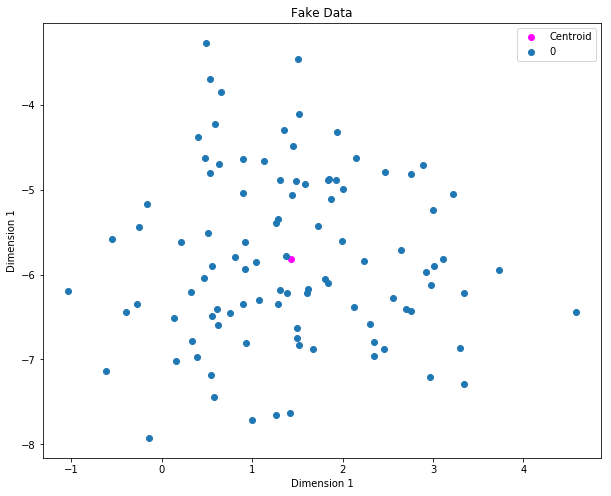

In [5]:
fig = plt.figure(figsize=(10, 8))
plt.scatter(centroids[0][0], centroids[0][1], label="Centroid", color="magenta")
plot_clusters(X, y)

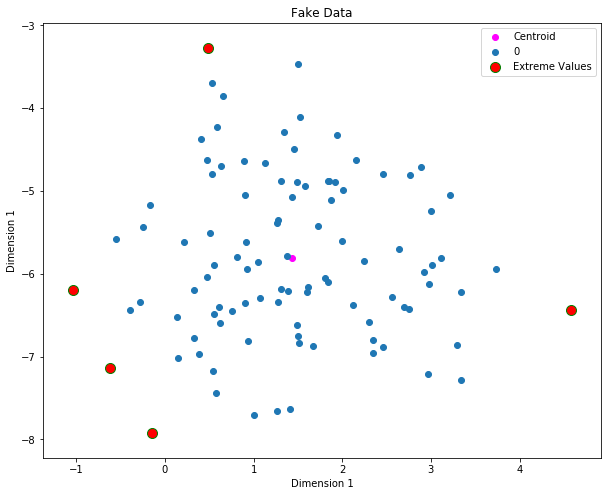

In [8]:
distances = clf.transform(X)
fig = plt.figure(figsize=(10, 8))

plt.scatter(centroids[0][0], centroids[0][1], label="Centroid", color="magenta")

sorted_indices = list(reversed(np.argsort(distances.ravel())))[:5]
plot_clusters(X, y)

plt.scatter(X[sorted_indices][:, 0], X[sorted_indices][:, 1], color="red", edgecolor="green", 
            s=100, label="Extreme Values")
plt.legend()
plt.show()

We can treat the 5 extreme points as outliers. 